# PP2 - Parte 2

## Import das bibliotecas

In [1]:
import numpy as np
import random
import
import matplotlib.pyplot as plt

## Import do arquivo a ser usado

In [2]:
dados_brutos = np.fromfile('./data2.txt')


## Organização dos dados

In [3]:
dados = dados_brutos.reshape((600,3))
dados = dados.transpose()

# print(len(dados))

vetor1 = np.array(dados[0])
vetor2 = np.array(dados[1])
vetor_resposta = np.array(dados[2])
x0 = -1


## Inicialização das configurações a serem usadas

In [4]:
# Distribuição uniforme aleatório dos pesos,
# Produto cartesiano a ser feito
pes = np.array([0.4, 0.1, 0.01])
aleatorio = np.array([[-100,100], [-1, 1], [-0.5, 0.5]])

# Vetores vazios que serão adicionados
configuracoes = np.array([]).reshape(0, 2)
vetor_peso = np.empty([9, 3])

for i in range(3):
    for j in range(3):
        config = aleatorio[i] * pes[j] # Produto cartesiano
        # print(config)

        # Adicionar ao vetor de configurações possíveis
        configuracoes = np.vstack((configuracoes, config))

        #Adicionar ao vetor de pesos aleatórios
        # vetor_peso = np.vstack((vetor_peso, np.random.uniform(config[0], config[1], 3)))

print("Configurações: ", configuracoes)
# print("Pesos: ", vetor_peso)

Configurações:  [[-4.e+01  4.e+01]
 [-1.e+01  1.e+01]
 [-1.e+00  1.e+00]
 [-4.e-01  4.e-01]
 [-1.e-01  1.e-01]
 [-1.e-02  1.e-02]
 [-2.e-01  2.e-01]
 [-5.e-02  5.e-02]
 [-5.e-03  5.e-03]]
Pesos:  [[ 0.00000000e+000              nan  1.55419307e-311]
 [ 0.00000000e+000  3.67189588e-320  5.43472210e-323]
 [ 1.55418050e-311  1.55418921e-311  2.32210854e-322]
 [ 0.00000000e+000              nan  1.55419307e-311]
 [-1.02533763e-277  1.55418050e-311  3.70746861e-320]
 [ 2.96439388e-323  1.55418050e-311  1.55418921e-311]
 [ 4.94065646e-324  0.00000000e+000              nan]
 [ 1.55419307e-311  0.00000000e+000  3.74699386e-320]
 [ 5.43472210e-323  1.55418050e-311  1.55418921e-311]]


## Função de ativação

In [5]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
    if saida >= 0:
        return 1
    else:
        return 0
        

## Principal - Aprendizado

In [7]:
res_temp = 0                  # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(600)  # Vetor que será comparado com o resultado

n = 0.1             # Taxa de aprendizado
mudanca_peso = 0    # N de ajustes de peso
mudanca_total = 0   # N total de ajustes de peso
epoca = 0           # Epocas de ajuste

vetor_epoca = np.zeros([9, 100], dtype=int)           # Vetor das epocas
vetor_mudanca_peso = np.zeros([9, 100], dtype=int)    # Vetor dos ajustes totais
# vetor_mudanca_total = np.empty([1, 9], dtype=int)     # Vetor dos pesos totais

fa = 0              # Funcao de ativacao

# No caso do pp2, vai repetir 9 vezes
for possibilidades in range(len(configuracoes)):

    #Repetir 100 vezes para gerar dados
    for instancia in range(100):

        vetor_peso[possibilidades] = np.random.uniform(configuracoes[possibilidades][0], configuracoes[possibilidades][1], 3) 

        #Ele só para quando o vetor de respostas for igual ao vetor final
        while(True):

            #Repetir pela quantidade de vezes que tiver nos dados
            for i in range(len(dados[0])):

                # Soma dos produtos
                vetor_res_temp = (x0 * vetor_peso[possibilidades][0]) + (vetor1[i] * vetor_peso[possibilidades][1]) + (vetor2[i] * vetor_peso[possibilidades][2])

                # funcao de ativacao
                fa = funcao_ativacao(vetor_res_temp)

                vetor_final[i] = fa

                if (fa != vetor_resposta[i]): #Se estiver errado

                    #Erro é (esperado - funcao ativacao)
                    erro = vetor_resposta[i] - fa

                    valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
                    #Ajuste de peso
                    vetor_peso[possibilidades] = vetor_peso[possibilidades] + (n*erro*valor_anterior)

                    #Adicionar quantidade de mudanças totais
                    vetor_mudanca_peso[possibilidades][instancia] += 1

            #Adicionar quantas epocas houveram
            vetor_epoca[possibilidades][instancia] += 1

            if((vetor_resposta == vetor_final).all()):
                break


print("acabou!")
# Se for true, quer dizer que os dois são iguais, chegou a uma convergência
# print((vetor_resposta == vetor_final).all())


acabou!


## Calculo da Média e Desvio padrão dos ajustes e épocas

In [23]:
#Vetor das 100 mudancas e epocas
print(vetor_mudanca_peso)
print(vetor_epoca)

[[ 456  917   84  963  853  903 1070  285  698  954  713  463  898  815
  1393 1080 1205  845  148  856 1017   73  792  757  894 1003    7 1179
  1171  910  263  410 1297  237  777  179  334  210  993  424  674  694
   622  830  738  419  191  345  748  652  746  445  550  374 1120  136
   433  560  862  675  385  640  702  452  811 1049  288  506  690  271
   766  199  999  401  553  719  681  256  589  993  234  757  660  174
   318  184  193  511  103  664  777  386  173  753  933  509  733  275
   708  246]
 [ 177  191  196  317  250  100  218   34  119  126  182   78   40  179
    34   56  155  241   96   36  253  138   91  164  247  193  146   18
   215  111  100   69  140  165   69  199  344  190  266  229  225  270
   137   36   88  153  128  170  154   21  190  227  109  107   41  257
   162   89  205  230   53  215   84    0  374   75   88   19  375   57
    56  144    8  262  267  182  126  274   11  305  161   96  126  183
   123  227   87  330  108  239  255   71   76  154

In [10]:
# Media e desvio padrao dos ajustes
ajuste_vetor_medias = np.zeros(9)
ajuste_vetor_desvio_padrao = np.empty(9)

#Media e desvio padrao da epoca
epoca_vetor_medias = np.empty(9)
epoca_vetor_desvio_padrao = np.empty(9)

for i in range(len(vetor_epoca)):
    ajuste_vetor_medias[i] = np.mean(vetor_mudanca_peso[i])
    ajuste_vetor_desvio_padrao[i] = np.std(vetor_mudanca_peso[i])

    epoca_vetor_medias[i] = np.mean(vetor_epoca[i])
    epoca_vetor_desvio_padrao[i] = np.std(vetor_epoca[i])


print(ajuste_vetor_medias)
print(ajuste_vetor_desvio_padrao)

print(epoca_vetor_medias)
print(epoca_vetor_desvio_padrao)

[615.81 155.47  20.29  13.38  10.4    9.22  12.26  11.56   9.1 ]
[317.20260702  88.60016422  10.45781526   6.63593249   4.50998891
   0.68673139   5.18385957   4.54823043   0.43588989]
[33.4  11.02  5.55  5.93  5.79  5.16  6.21  6.33  5.09]
[26.02806178  5.1729682   2.11837202  1.99125589  1.69879369  0.50438081
  2.08468223  1.90291881  0.40236799]


## Plot do gráfico

[ 456  917   84  963  853  903 1070  285  698  954  713  463  898  815
 1393 1080 1205  845  148  856 1017   73  792  757  894 1003    7 1179
 1171  910  263  410 1297  237  777  179  334  210  993  424  674  694
  622  830  738  419  191  345  748  652  746  445  550  374 1120  136
  433  560  862  675  385  640  702  452  811 1049  288  506  690  271
  766  199  999  401  553  719  681  256  589  993  234  757  660  174
  318  184  193  511  103  664  777  386  173  753  933  509  733  275
  708  246]


(array([ 5., 16., 11., 12., 12., 18., 12.,  8.,  4.,  2.]),
 array([   7. ,  145.6,  284.2,  422.8,  561.4,  700. ,  838.6,  977.2,
        1115.8, 1254.4, 1393. ]),
 <a list of 10 Patch objects>)

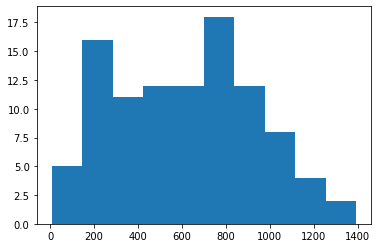

In [24]:
# Plot da reta e dos pares

# cor = np.where(vetor_resposta == 0, "green", "red")

# print("Total de ajustes de peso: ", mudanca_total)
# print("Total de épocas: ", epoca)

# plt.scatter(vetor1,vetor2, c=cor)
# plt.plot(x, y)
print(vetor_mudanca_peso[0])

plt.hist(vetor_mudanca_peso[0])
